In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.filters import gaussian
from skimage.transform import downscale_local_mean

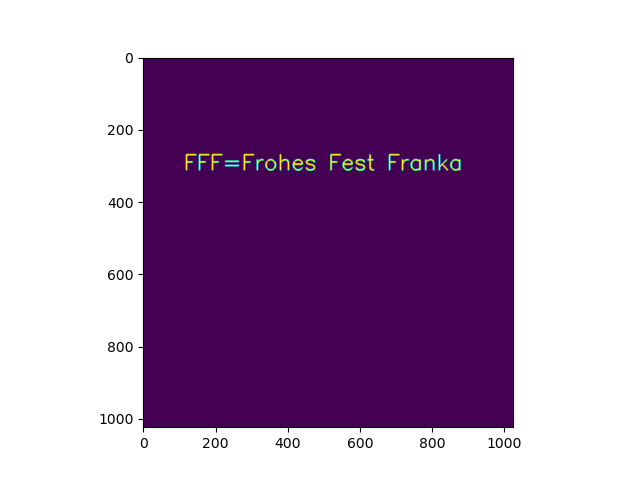

In [134]:
rect = np.zeros((1024, 1024), dtype=np.float64)
h, w = rect.shape
rect = cv2.putText(rect, "FFF=Frohes Fest Franka", (w//2-400, h//2-200), cv2.FONT_HERSHEY_SIMPLEX, 2, 2, thickness=3)

plt.clf()
plt.imshow(rect)
plt.show()

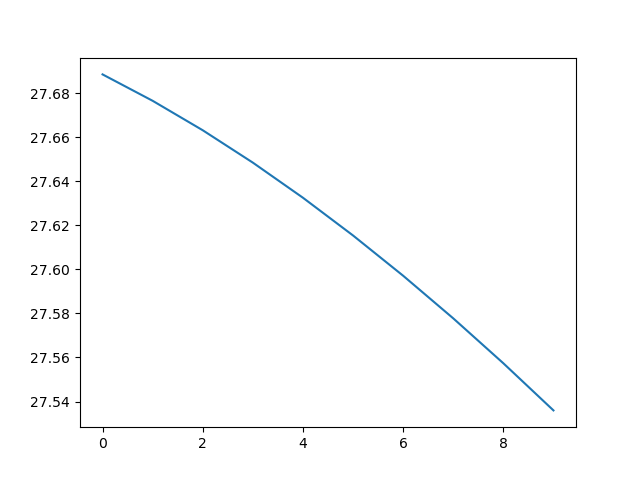

In [135]:
%matplotlib widget
plt.clf()
def ifta(amplitude, n_iter):
    #h, w = amplitude.shape
    l = []
    #amplitude = np.pad(amplitude, amplitude.shape)
    amplitude = amplitude
    #phase = np.random.uniform(-.1, .1, amplitude.shape)
    phase = np.zeros_like(amplitude)
    amplitude_start = np.ones_like(phase)
    forward = np.fft.fftshift(np.fft.fft2(amplitude_start * np.exp(1j*phase)))
    phase = 0.99*phase - 0.02*np.angle(forward)
    #phase = np.angle(forward)
    for i in range(n_iter):
        backward = np.fft.ifft2(np.fft.fftshift(amplitude * np.exp(1j*phase)))
        #phase = np.angle(backward)
        phase = 0.99*phase - 0.02*np.angle(backward)# + np.random.uniform(-.01, .01, phase.shape)
        forward = np.fft.fft2(amplitude_start * np.exp(1j*phase))
        loss = np.sqrt(np.sum((amplitude - np.flip(np.abs(forward)**2))**2))
        l.append(loss)
    return l, np.angle(backward)#[h:-h, w:-w]
        
loss, phase = ifta(rect, 15)
mask = np.zeros_like(phase)
mask[h//2-230:h//2+230, w//2-230:w//2+230] = 1
phase = phase*mask
phase = phase / np.max(phase)
phase[phase < 0] = 0
phase[phase > 0] = np.pi/2
#phase = downscale_local_mean(phase, 2)
#amp[h//2-10:h//2+10, w//2-10:w//2+10] = 0
#plt.imshow(amp[100:300, 100:500], cmap='inferno')
#plt.imshow(amp, cmap='inferno')
plt.plot(np.log(loss[5:]))
#plt.subplot(132)
#plt.imshow(phase)
#plt.subplot(133)
#plt.imshow(rect)
plt.show()

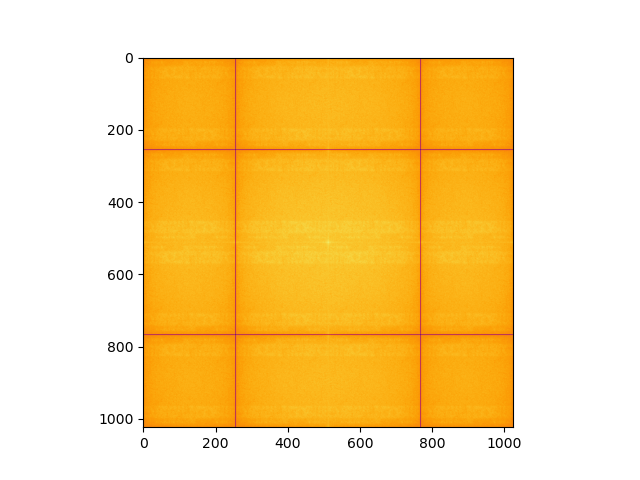

In [158]:
plt.clf()
scale = .25
phase_ds = cv2.resize(phase, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)
phase_ds = cv2.resize(phase_ds, (0, 0), fx=1/scale, fy=1/scale, interpolation=cv2.INTER_NEAREST)
amp = np.abs(np.fft.fftshift(np.fft.fft2(np.exp(1j*phase_ds))))**2
#amp[h//2-9:h//2+9, w//2-9:w//2+9] = 0
plt.imshow(amp**.01, cmap='inferno')
#plt.imshow(phase)
plt.show()

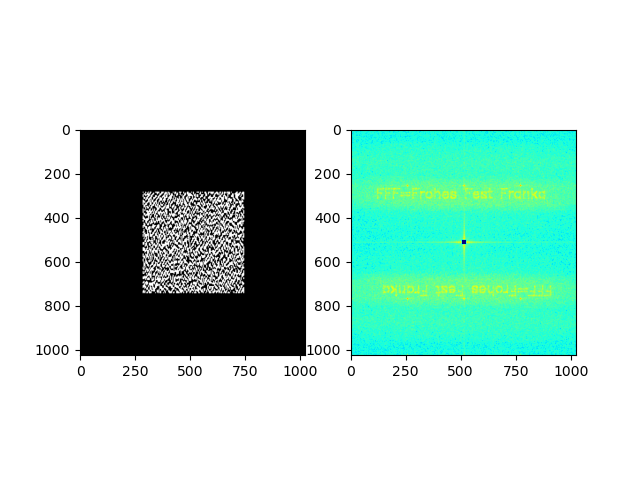

In [162]:
#amp_mask = np.fft.fft2(rect)
#amp_mask = np.fft.fftshift(np.imag(amp_mask))
#amp_mask = amp_mask / np.max(amp_mask)

plt.figure("amp_mask")
plt.clf()
amp_mask = phase_ds.copy()
amp_mask[amp_mask > 0] = 1
amp_mask = 1 - amp_mask
wave = np.exp(-1j*phase*(2*np.pi/(633e-6)))
image = np.fft.fftshift(np.abs(np.fft.fft2(wave*amp_mask))**2)
image[h//2-10:h//2+10, w//2-10:w//2+10] = 0
plt.subplot(121)
plt.imshow(amp_mask, cmap='Greys')
plt.subplot(122)
plt.imshow(image**.1, cmap='jet')
plt.show()